In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizza_types = pd.read_csv('pizza_types.csv',encoding = 'latin1')
pizzas = pd.read_csv('pizzas.csv')

In [3]:
df = orders.merge(order_details, on = "order_id" , how = "left")
df = df.merge(pizzas, on = "pizza_id", how = "left")
df = df.merge(pizza_types, on = "pizza_type_id", how = "left")

In [7]:
print(df.head())

   order_id        date      time  order_details_id       pizza_id  quantity  \
0         1  2015-01-01  11:38:36                 1     hawaiian_m         1   
1         2  2015-01-01  11:57:40                 2  classic_dlx_m         1   
2         2  2015-01-01  11:57:40                 3  five_cheese_l         1   
3         2  2015-01-01  11:57:40                 4    ital_supr_l         1   
4         2  2015-01-01  11:57:40                 5     mexicana_m         1   

  pizza_type_id size  price                       name category  \
0      hawaiian    M  13.25         The Hawaiian Pizza  Classic   
1   classic_dlx    M  16.00   The Classic Deluxe Pizza  Classic   
2   five_cheese    L  18.50      The Five Cheese Pizza   Veggie   
3     ital_supr    L  20.75  The Italian Supreme Pizza  Supreme   
4      mexicana    M  16.00         The Mexicana Pizza   Veggie   

                                         ingredients  
0           Sliced Ham, Pineapple, Mozzarella Cheese  
1  Pep

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [9]:
df.isnull().sum()

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [10]:
df.describe()

,order_id,order_details_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,10701.479761,24310.500000,1.019622,16.494132
std,6180.119770,14035.529381,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,5337.000000,12155.750000,1.000000,12.750000
50%,10682.500000,24310.500000,1.000000,16.500000
75%,16100.000000,36465.250000,1.000000,20.250000
max,21350.000000,48620.000000,4.000000,35.950000


In [11]:
print(df["order_id"].duplicated().sum())

27270


# Pizza Category Count

C:\Users\akhil\AppData\Local\Temp\ipykernel_8836\924344024.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  size = sns.countplot(x="category",data=df,palette="pastel",edgecolor="black"  # Adds border to bars


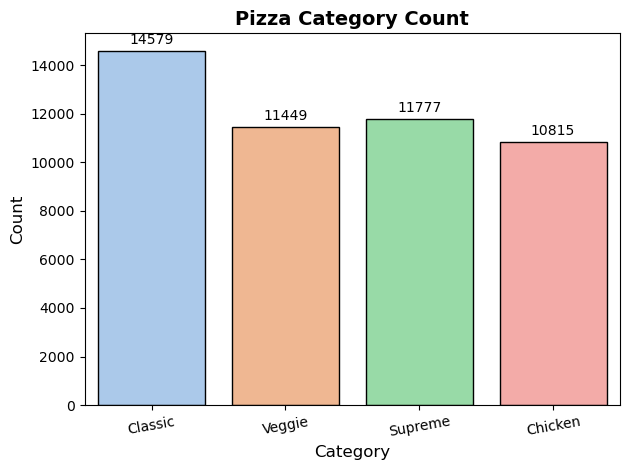

In [19]:
size = sns.countplot(x="category",data=df,palette="pastel",edgecolor="black"  # Adds border to bars)

# Add value labels on top of bars
for container in size.containers:
    size.bar_label(container, padding=3)

# Set title and labels
plt.title("Pizza Category Count", fontsize=14, fontweight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x labels if needed
plt.xticks(rotation=10)

plt.tight_layout()
plt.show()

# Top 10 Most Ordered Pizzas

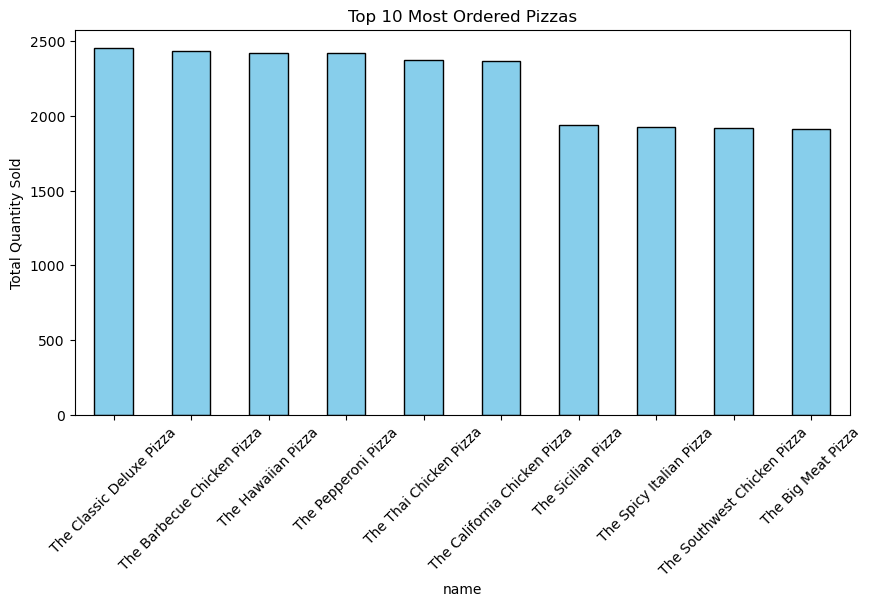

In [5]:
top_pizzas = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(10)
top_pizzas.plot(kind='bar', figsize=(10,5), color='skyblue', edgecolor='black')
plt.title("Top 10 Most Ordered Pizzas")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

# Most Revenue By Pizza Category

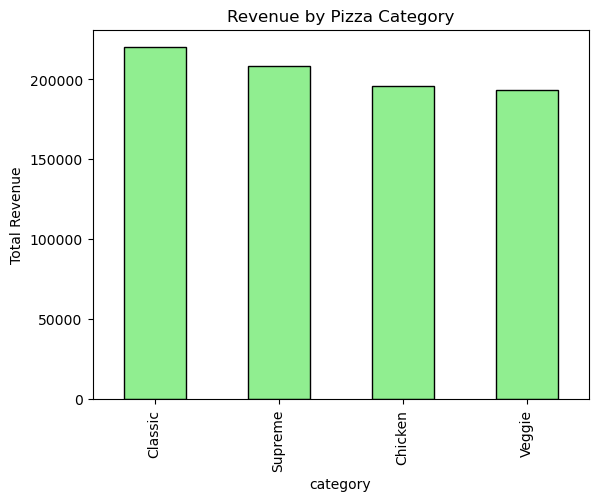

In [7]:
df["revenue"] = df["price"] * df["quantity"]
category_revenue = df.groupby("category")["revenue"].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Revenue by Pizza Category")
plt.ylabel("Total Revenue")
plt.show()

# Daily Oreders Over Time

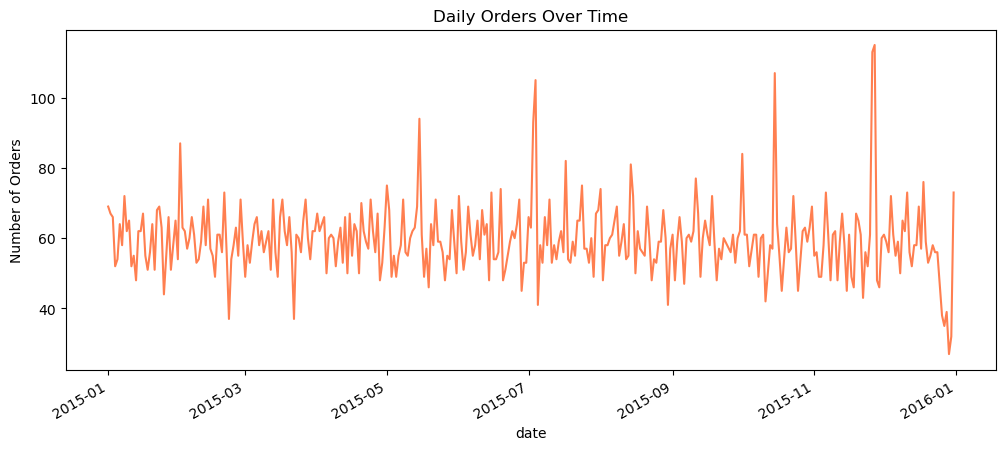

In [8]:
df['date'] = pd.to_datetime(df['date'])
orders_over_time = df.groupby("date")["order_id"].nunique()
orders_over_time.plot(figsize=(12,5), color='coral')
plt.title("Daily Orders Over Time")
plt.ylabel("Number of Orders")
plt.show()

# Pizza Orders By Size

C:\Users\akhil\AppData\Local\Temp\ipykernel_6736\4266005944.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="size", data=df, palette="muted", order=["S", "M", "L", "XL", "XXL"])


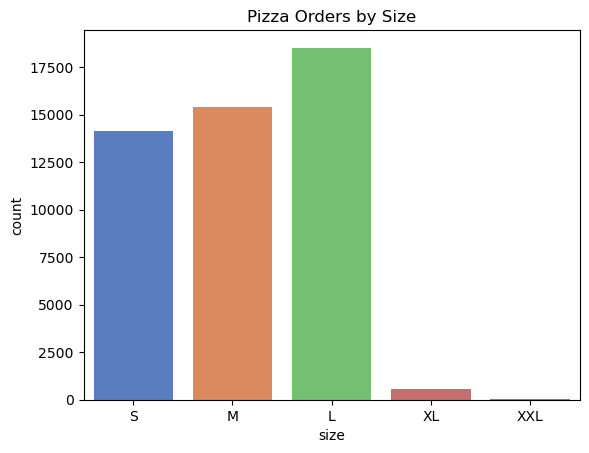

In [9]:
sns.countplot(x="size", data=df, palette="muted", order=["S", "M", "L", "XL", "XXL"])
plt.title("Pizza Orders by Size")
plt.show()

# Top 10 Highest Revenue Pizzas

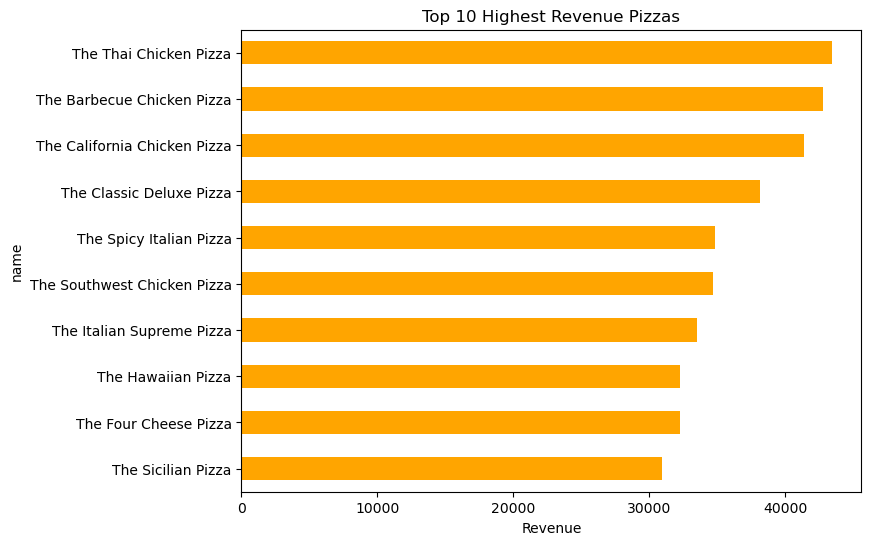

In [10]:
revenue_by_pizza = df.groupby("name")["revenue"].sum().sort_values(ascending=False).head(10)
revenue_by_pizza.plot(kind='barh', figsize=(8,6), color='orange')
plt.title("Top 10 Highest Revenue Pizzas")
plt.xlabel("Revenue")
plt.gca().invert_yaxis()
plt.show()

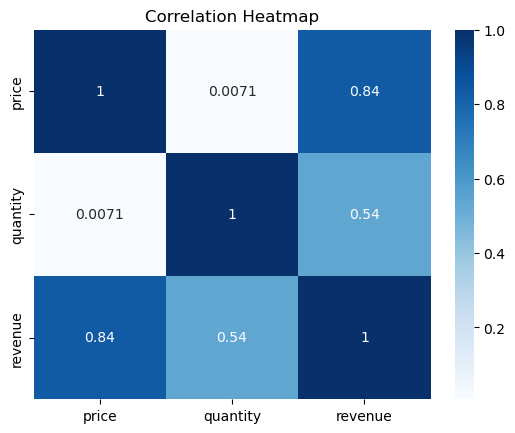

In [12]:
sns.heatmap(df[["price", "quantity", "revenue"]].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

# Order Frequency by Hour

C:\Users\akhil\AppData\Local\Temp\ipykernel_6736\374138378.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time'], errors='coerce').dt.hour


Text(0.5, 1.0, 'Order Frequency by Hour')

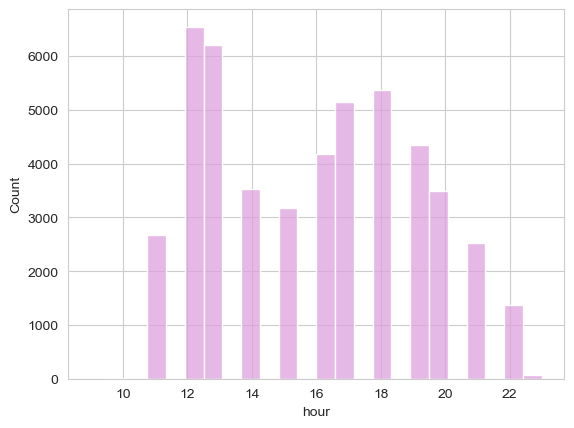

In [18]:
df['hour'] = pd.to_datetime(df['time'], errors='coerce').dt.hour
sns.histplot(df['hour'].dropna(), bins=24, kde=False, color="plum")
axes[2, 2].set_title("Order Frequency by Hour")

# Subplots

C:\Users\akhil\AppData\Local\Temp\ipykernel_6736\1590532096.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time'], errors='coerce').dt.hour
C:\Users\akhil\AppData\Local\Temp\ipykernel_6736\1590532096.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pizzas.values, y=top_pizzas.index, ax=axes[0, 0], palette="Blues_d")
C:\Users\akhil\AppData\Local\Temp\ipykernel_6736\1590532096.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="category", data=df, palette="pastel", edgecolor="black", ax=axes[0, 1])
C:\

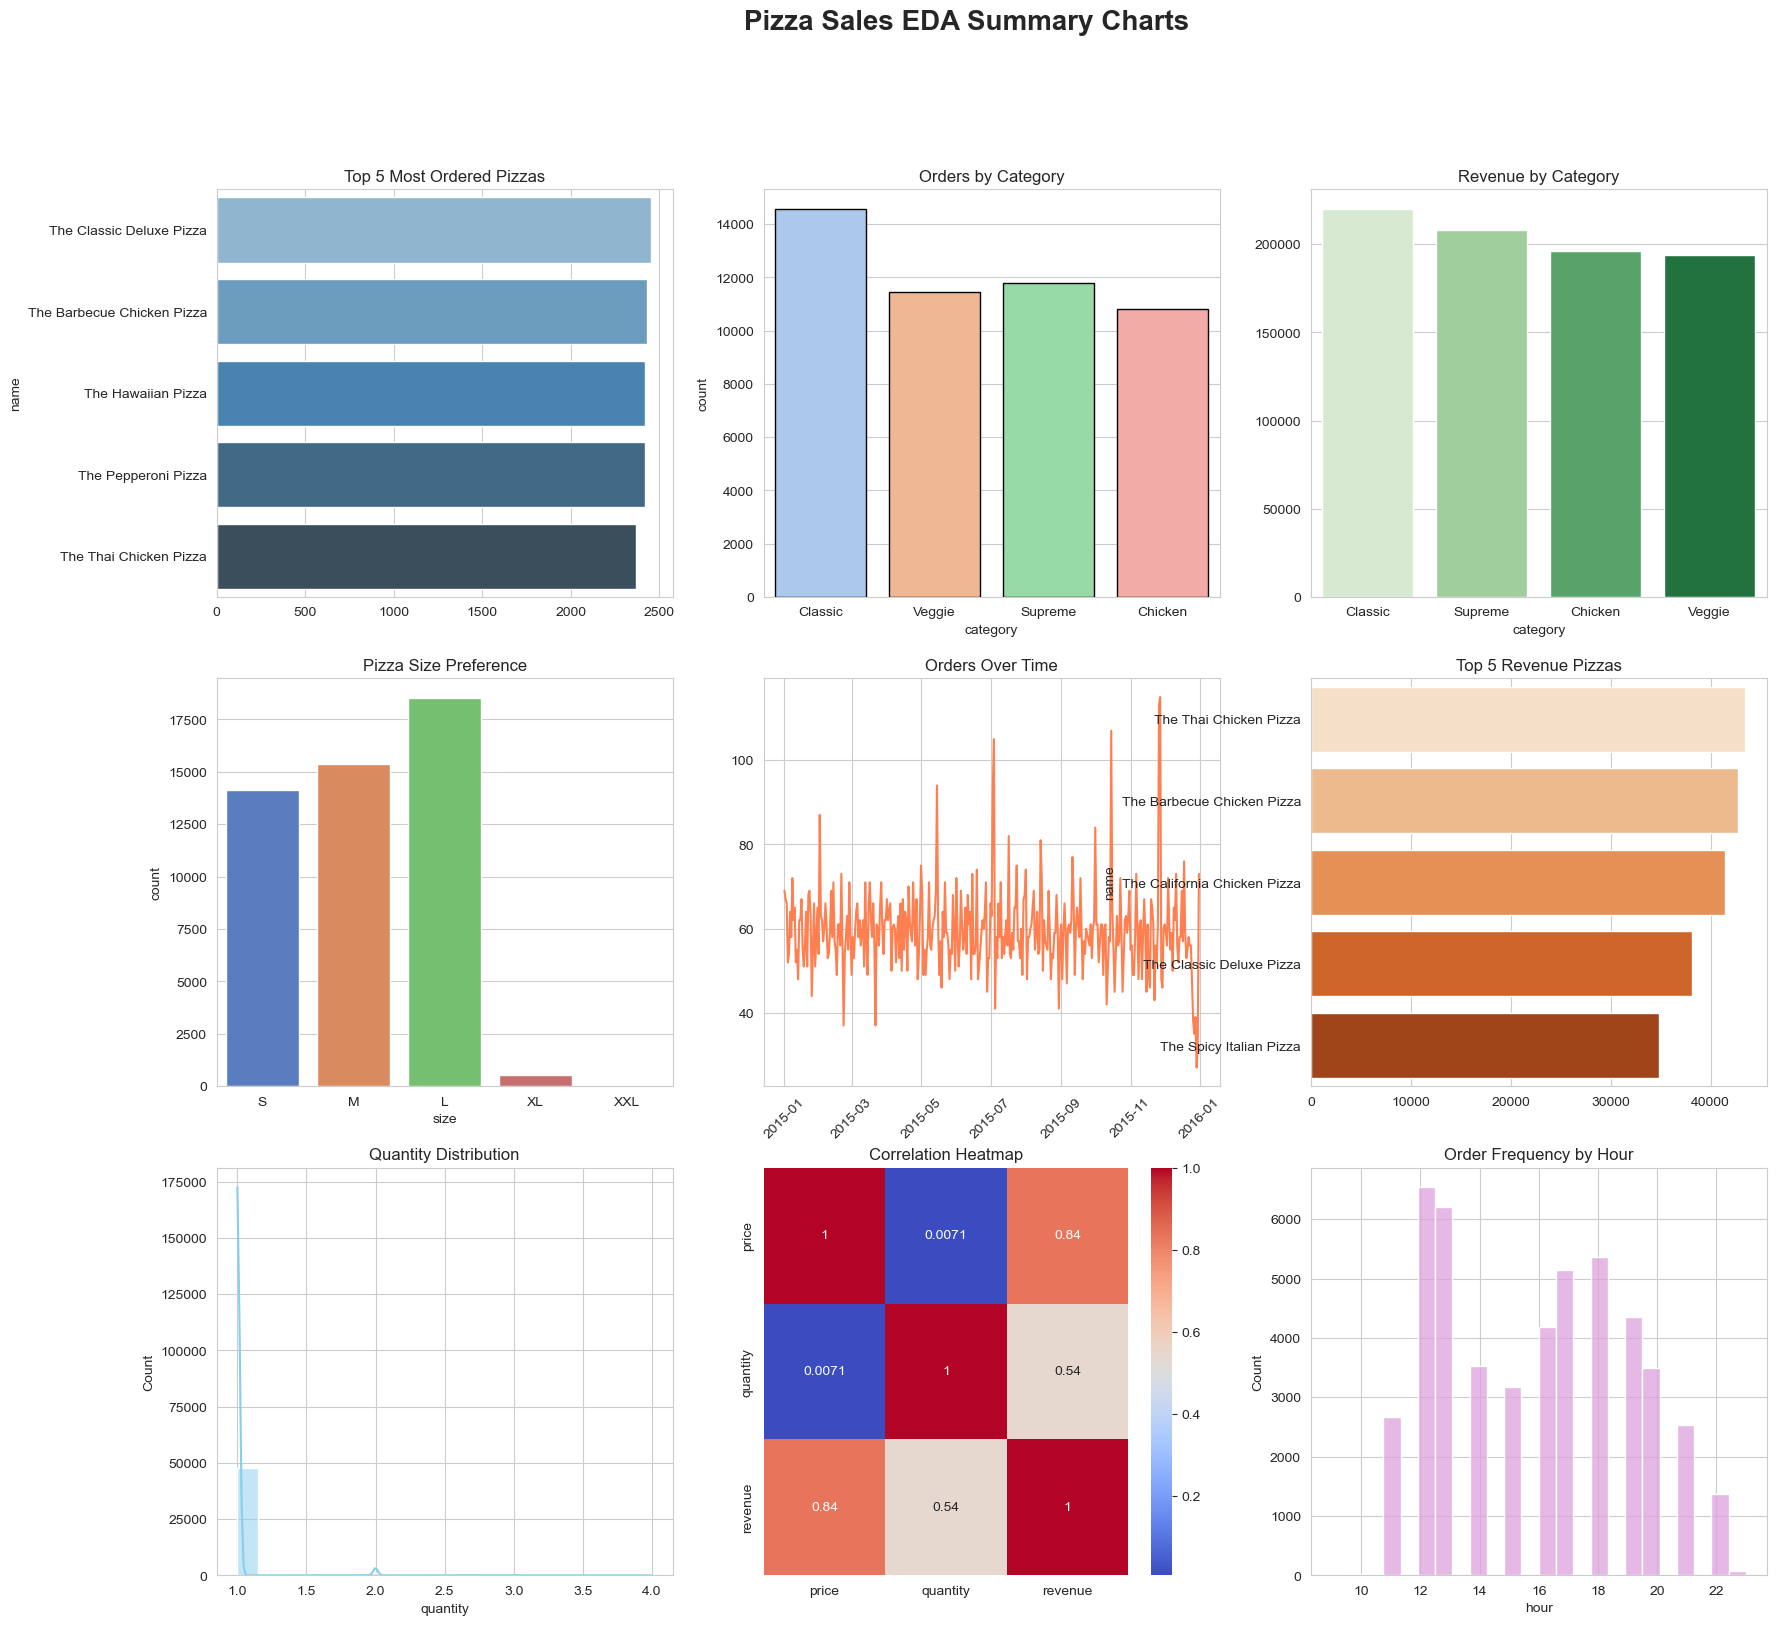

In [13]:

df['date'] = pd.to_datetime(df['date'])
df['revenue'] = df['price'] * df['quantity']
df['hour'] = pd.to_datetime(df['time'], errors='coerce').dt.hour

# Plot style
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle("Pizza Sales EDA Summary Charts", fontsize=20, fontweight='bold')

# Chart 1: Top 5 Most Ordered Pizzas
top_pizzas = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5)
sns.barplot(x=top_pizzas.values, y=top_pizzas.index, ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title("Top 5 Most Ordered Pizzas")

# Chart 2: Orders by Category
sns.countplot(x="category", data=df, palette="pastel", edgecolor="black", ax=axes[0, 1])
axes[0, 1].set_title("Orders by Category")

# Chart 3: Revenue by Category
category_revenue = df.groupby("category")["revenue"].sum().sort_values(ascending=False)
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="Greens", ax=axes[0, 2])
axes[0, 2].set_title("Revenue by Category")

# Chart 4: Pizza Size Preference
sns.countplot(x="size", data=df, palette="muted", order=["S", "M", "L", "XL", "XXL"], ax=axes[1, 0])
axes[1, 0].set_title("Pizza Size Preference")

# Chart 5: Orders Over Time
orders_over_time = df.groupby("date")["order_id"].nunique()
axes[1, 1].plot(orders_over_time.index, orders_over_time.values, color='coral')
axes[1, 1].set_title("Orders Over Time")
axes[1, 1].tick_params(axis='x', rotation=45)

# Chart 6: Top 5 Revenue Pizzas
revenue_by_pizza = df.groupby("name")["revenue"].sum().sort_values(ascending=False).head(5)
sns.barplot(x=revenue_by_pizza.values, y=revenue_by_pizza.index, palette="Oranges", ax=axes[1, 2])
axes[1, 2].set_title("Top 5 Revenue Pizzas")

# Chart 7: Quantity Distribution
sns.histplot(df["quantity"], bins=20, kde=True, ax=axes[2, 0], color='skyblue')
axes[2, 0].set_title("Quantity Distribution")

# Chart 8: Correlation Heatmap
sns.heatmap(df[["price", "quantity", "revenue"]].corr(), annot=True, cmap="coolwarm", ax=axes[2, 1])
axes[2, 1].set_title("Correlation Heatmap")

# Chart 9: Order Frequency by Hour
sns.histplot(df['hour'].dropna(), bins=24, kde=False, color="plum", ax=axes[2, 2])
axes[2, 2].set_title("Order Frequency by Hour")


plt.show()

In [14]:
df.columns.values

array(['order_id', 'date', 'time', 'order_details_id', 'pizza_id',
       'quantity', 'pizza_type_id', 'size', 'price', 'name', 'category',
       'ingredients', 'revenue', 'hour'], dtype=object)